<a href="https://colab.research.google.com/github/JoDeMiro/Ember/blob/main/Python_Fuzzy_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.youtube.com/watch?v=F0Bk4zJLCCE

In [ ]:
!pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 6.7MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp37-none-any.whl size=894069 sha256=b5e158704fcbf3586dcd1d4dabfe971d98c114002cf3f36f087ed10d8970f623
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzzy
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [ ]:
mte = ctrl.Antecedent(np.arange(1, 41, 1), 'mte')

mte['poor']     = fuzzy.trimf(mte.universe, [1, 5, 15])
mte['average']  = fuzzy.trapmf(mte.universe, [13, 20, 25, 28])
mte['good']     = fuzzy.trimf(mte.universe, [25, 35, 40])

ete = ctrl.Antecedent(np.arange(1, 71, 1), 'ete')

ete['poor']     = fuzzy.trimf(ete.universe, [1, 15, 20])
ete['average']  = fuzzy.trapmf(ete.universe, [18, 28, 35, 48])
ete['good']     = fuzzy.trapmf(ete.universe, [45, 59, 65, 70])

ca = ctrl.Antecedent(np.arange(1, 31, 1), 'ca')

ca['poor']     = fuzzy.trimf(ca.universe, [1, 5, 12])
ca['average']  = fuzzy.trapmf(ca.universe, [10, 15, 18, 21])
ca['good']     = fuzzy.trapmf(ca.universe, [18, 24, 27, 30])

In [ ]:
cgpa = ctrl.Consequent(np.arange(1, 11, 1), 'cgpa')
cgpa.automf(5)

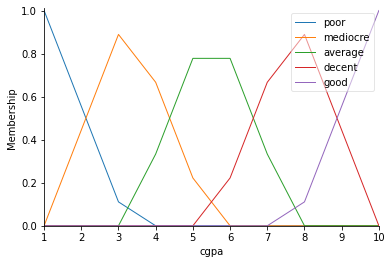

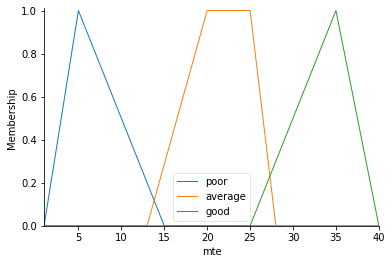

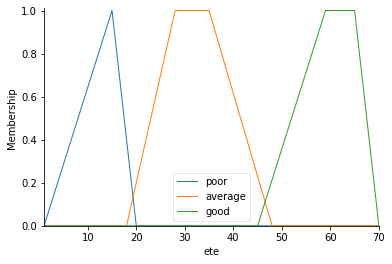

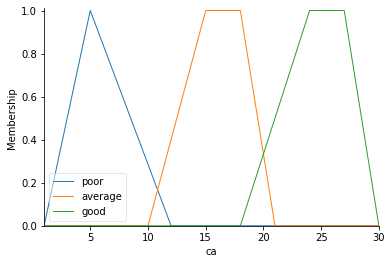

In [ ]:
cgpa.view()
mte.view()
ete.view()
ca.view()

In [ ]:
rule1 = ctrl.Rule(ca['average'] & mte['poor'] & ete['good'], cgpa['good'])

In [ ]:
tipping = ctrl.ControlSystem([rule1])

In [ ]:
tip = ctrl.ControlSystemSimulation(tipping)

In [ ]:
tip.input['ca'] = 16
tip.input['mte'] = 5
tip.input['ete'] = 61

tip.compute()

print(tip.output['cgpa'])

9.19047619047619
